### 2021 Spring "EE479: Scientific Computing & Data"

#### Yumin Song (KAIST EE Yong-Hoon Kim Group) 

#### Kutz 8.2 Advenced Iterative Solution Method for Ax = b

#### 2021. 05. 17 Revised 

In addition to the standard techniques of Gaussian elimination or LU decomposition for solving
Ax = b, a wide range of iterative techniques are available.

#### Application to advection - diffusion (Jacobi method)

Letting $ \psi_{mn} $ be the diagonal term. the iteration procedure yields

$$ \psi_{mn}^{k+1}  =  \frac{\psi_{(m+1)n}^{k}+\psi_{(m-1)n}^{k}+\psi_{m(n+1)}^{k}+\psi_{m(n-1)}^{k}-\delta^2\omega_{mn}}{4} $$

We consider count associated with iteration methods. This will allow
us to compare this solution technique with Gaussian elimination and LU decomposition. The
following basic algorithmic steps are involved:

##### 1. Update each $\psi_{mn}$ which costs N operations times the number of nonzero diagonals D

##### 2. For each $\psi_{mn}$, perform the appropriate additions and subtractions. In this case there are five operations.

##### 3. Iterate until the desired convergence which costs K operations.

The code implementaion is as follows.

Size of A matrix = 2500


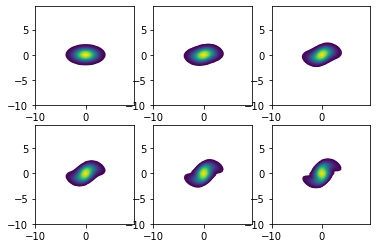

In [4]:
import numpy as np
import scipy.sparse.linalg as linag
import time
import matplotlib.pyplot as plt

N=2500
########################################### A Matrix construct 
I2 = -4*np.eye(N)
E = np.diag(np.ones((N-1)), k=1)
E2 = np.diag( np.ones(int(np.sqrt(N))), N-int(np.sqrt(N))  )
E3 = np.diag( np.ones(N-int(np.sqrt(N))), int(np.sqrt(N))  )
A = I2 + E + E.T +E2 + E2.T + E3 + E3.T

#I2 = -4*np.eye(N)
E = np.diag(np.ones((N-1)), k=1)
E2 = np.diag( np.ones(int(np.sqrt(N))), N-int(np.sqrt(N))  )
E3 = np.diag( np.ones(N-int(np.sqrt(N))), int(np.sqrt(N))  )
A_jacobi =  E + E.T +E2 + E2.T + E3 + E3.T
for i in range(int(np.sqrt(N))):
    A_jacobi[(i+1)*int(np.sqrt(N))-1,int(np.sqrt(N))*i] = 1
    A_jacobi[int(np.sqrt(N))*i,(i+1)*int(np.sqrt(N))-1] = 1
    A_jacobi[int(np.sqrt(N))*i,int(np.sqrt(N))*i-1] = 0
    A_jacobi[int(np.sqrt(N))*i-1,int(np.sqrt(N))*i] = 0
I2 = -4*np.eye(N)
E = np.diag(np.ones((N-1)), k=1)
E2 = np.diag( np.ones(int(np.sqrt(N))), N-int(np.sqrt(N))  )
E3 = np.diag( np.ones(N-int(np.sqrt(N))), int(np.sqrt(N))  )
A = I2 + E + E.T +E2 + E2.T + E3 + E3.T
for i in range(int(np.sqrt(N))):
    A[(i+1)*int(np.sqrt(N))-1,int(np.sqrt(N))*i] = 1
    A[int(np.sqrt(N))*i,(i+1)*int(np.sqrt(N))-1] = 1
    A[int(np.sqrt(N))*i,int(np.sqrt(N))*i-1] = 0
    A[int(np.sqrt(N))*i-1,int(np.sqrt(N))*i] = 0
################################# 8.5 Overcoming Computational difficulties
#A[0,0] = 0 
###################################### Gradient matrix construct #####
for i in range(int(np.sqrt(N))):
    A[(i+1)*int(np.sqrt(N))-1,int(np.sqrt(N))*i] = 1
    A[int(np.sqrt(N))*i,(i+1)*int(np.sqrt(N))-1] = 1
    A[int(np.sqrt(N))*i,int(np.sqrt(N))*i-1] = 0
    A[int(np.sqrt(N))*i-1,int(np.sqrt(N))*i] = 0


A_gx1 =  np.diag(np.ones((N-1)), k=1)
A_gx =  A_gx1 - A_gx1.T
for i in range(int(np.sqrt(N))):  
    A_gx[ int(np.sqrt(N))*(i) , int(np.sqrt(N))*i-1] = 0
    A_gx[ int(np.sqrt(N))*i, int(np.sqrt(N))*(i+1)-1] = -1
    A_gx[ int(np.sqrt(N))*i-1,  int(np.sqrt(N))*(i) ] = 0
    A_gx[ int(np.sqrt(N))*(i+1)-1, int(np.sqrt(N))*i] = 1
    
A_gy1 =   np.diag(np.ones((N-int(np.sqrt(N)))), int(np.sqrt(N)))
A_gy2 =  -np.diag(np.ones((int(np.sqrt(N)))), N-int(np.sqrt(N)))
A_gy3 =  -np.diag(np.ones((N-int(np.sqrt(N)))), int(np.sqrt(N))).T
A_gy4 =   np.diag(np.ones((int(np.sqrt(N)))), N-int(np.sqrt(N))).T
A_gy = A_gy1 + A_gy2 + A_gy3 + A_gy4
##################################################################

x2 = np.linspace(-10,10,int(np.sqrt(N))+1)
y2 = np.linspace(-10,10,int(np.sqrt(N))+1)
#x2 = np.linspace(0,4,int(np.sqrt(N)+1))
#y2 = np.linspace(0,4,int(np.sqrt(N)+1))
x=x2[0:len(x2)-1];
y=y2[0:len(y2)-1];
[X,Y]=np.meshgrid(x,y);
#b = -2*np.sin(np.pi*X)*np.sin(np.pi*Y)*np.pi*np.pi
#b= b.reshape(N,1)
b = 1*np.exp(-0.25*X**2-Y**2);
#b= b.reshape(N,1)
test_b = np.zeros((int(np.sqrt(N)),int(np.sqrt(N))))
test_b[:,:] = np.sum(b) / int(np.sqrt(N)) / int(np.sqrt(N))
#print('test_b sum=',np.sum(test_b))
#test2b = np.zeros((int(np.sqrt(N)),int(np.sqrt(N))))
b = b - test_b
w= b.reshape(N,1)
#print('test_2b sum=',np.sum(b))
h = x[1]-x[0]
#print('h=',h)
A = A / h / h
A_gx = A_gx / (2*h)
A_gy = A_gy / (2*h)

print('Size of A matrix =', len(A))


x0 = np.zeros((N,1)) # initial guess
nu=0.001

wt2 = w
wt2 = wt2.reshape(N,order='F')

def Jacobi(A,w,x,h,N):
    w = w.reshape(len(w))
    for i in range(N):
        x_k1 = A.dot(x)/4 - h**2/4*w.T
     #   print(np.sqrt(np.sum(np.square(abs(x_k1 - x)))) )
        if np.sqrt(np.sum(np.square(abs(x_k1 - x)))) < 2 * 10**(-4):
            x = x_k1
            break
        else :
            x = x_k1
       # if i+1 == N :
         #   print('Can not find root')
    return x

x = np.zeros(N)

def spc_rhs(t,wt2):
    wt2 = wt2.reshape(N,1,order='F')    
    psi = Jacobi(A_jacobi,wt2,x,h,200)
    psi = psi.reshape(N,1)
    wt2 = A_gy.dot(psi) * A_gx.dot(wt2)   -  A_gx.dot(psi) * A_gy.dot(wt2) + nu*A.dot(wt2)
    wt2 = wt2.reshape(N,order='F')
    rhs = wt2
    return rhs

from scipy.integrate import solve_ivp

sol = solve_ivp (spc_rhs,[0,10], wt2, t_eval=[0, 2, 4, 6, 8,10] )

T = sol.t
F = sol.y
tspan = np.linspace(0,10,6)
levels = np.linspace(0.01,1,100)
for j in range(len(tspan)):
    plt.subplot(2,3,j+1)
    wf = (F[:,j].reshape(int(np.sqrt(N)),int(np.sqrt(N)))).real
    CS = plt.contour(X, Y, wf, levels)   # set levels automatically
   # plt.colorbar()

In this code, for step 1. we use jacobi method which is iterative method for solving  𝐴𝑥=𝑏 . In step 2. we use scipy.integrate.solve_ivp for calculating time-stepping ordinary differential equation. Using the input function 'spc_rhs', streamfunction is updated when volticity updated.

From the result, we can find the vorticity is rotate as times goes on(0s,2s,4s,6s,8s,10s).
And, we can find the direct method solution and iterative method solution is same.